In [ ]:
DATA ANALYSIS AND DATA SCIENCE WITH PYTHON
Task 5: Classification Tasks Overview

In [ ]:
Task 1: Student Pass/Fail Prediction

In [ ]:
Step 1: Dataset Selection
Columns Required:

Study Hours: Numeric (e.g., 10, 15, 20)
Attendance: Percentage (e.g., 70%, 80%, 90%)
Pass: Binary (0 for fail, 1 for pass)

In [1]:
import pandas as pd

data = {
    'Study_Hours': [10, 15, 20, 5, 25, 30, 2],
    'Attendance': [70, 80, 90, 40, 95, 98, 30],
    'Pass': [1, 1, 1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
print(df.head())


   Study_Hours  Attendance  Pass
0           10          70     1
1           15          80     1
2           20          90     1
3            5          40     0
4           25          95     1


In [ ]:
Step 2: Data Exploration

In [3]:
# Check for Missing Values & Outliers
print(df.isnull().sum())  # Check missing values
print(df.describe())  # Summary statistics

Study_Hours    0
Attendance     0
Pass           0
dtype: int64
       Study_Hours  Attendance      Pass
count     7.000000    7.000000  7.000000
mean     15.285714   71.857143  0.714286
std      10.355583   27.033489  0.487950
min       2.000000   30.000000  0.000000
25%       7.500000   55.000000  0.500000
50%      15.000000   80.000000  1.000000
75%      22.500000   92.500000  1.000000
max      30.000000   98.000000  1.000000


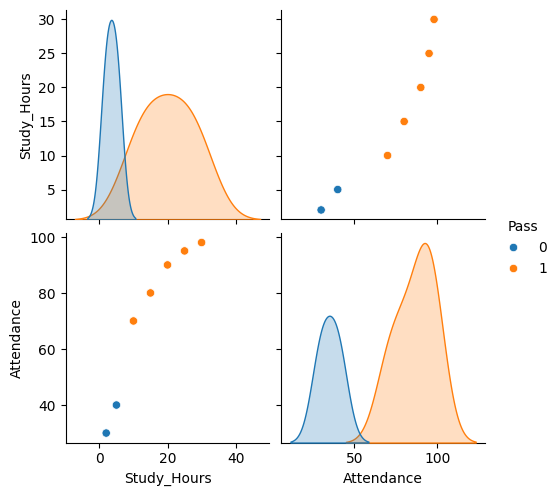

In [5]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="Pass")
plt.show()


In [ ]:
Step 3: Model Training (Logistic Regression)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['Study_Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
Step 4: Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix with specified labels
labels = [0, 1]  # Ensure both "fail/pass" or "negative/positive" labels are included
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 1.00
Confusion Matrix:
 [[0 0]
 [0 2]]


In [ ]:
Task 2: Sentiment Analysis with Natural Language Processing

In [53]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [55]:
from nltk.tokenize import word_tokenize
text = "Hello! How are you?"
tokens = word_tokenize(text)
print(tokens)  # Output: ['Hello', '!', 'How', 'are', 'you', '?']


['Hello', '!', 'How', 'are', 'you', '?']


In [45]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_csv("reviews.csv") 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Step 1: Load and Preprocess Dataset

In [33]:
import pandas as pd

# Sample data
data = {
    'Review_Text': [
        'I love this product! It is amazing.', 
        'Worst experience ever. Totally disappointed.', 
        'Great quality and fast delivery!', 
        'Not worth the money, very poor quality.', 
        'Absolutely fantastic! Highly recommend.', 
        'Terrible service, never ordering again.'
    ],
    'Sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('reviews.csv', index=False)

print("Sample reviews.csv file created successfully!")


Sample reviews.csv file created successfully!


In [39]:
from IPython.display import display

display(df)



,Review_Text,Sentiment
0,I love this product! It is amazing.,positive
1,Worst experience ever. Totally disappointed.,negative
2,Great quality and fast delivery!,positive
3,"Not worth the money, very poor quality.",negative
4,Absolutely fantastic! Highly recommend.,positive
5,"Terrible service, never ordering again.",negative


In [57]:
# Text Cleaning Function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatization
    return ' '.join(tokens)

df['Cleaned_Review'] = df['Review_Text'].apply(preprocess_text)

In [ ]:
Step 2: Text Vectorization (TF-IDF)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to 0,1


In [ ]:
Step 3: Model Training (Logistic Regression)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
Step 4: Model Evaluation

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
